**Identify The Problem Statement**

**In this competition, you’re challenged to build a machine learning model that predicts which Tweets are about real disasters and which one’s aren’t. You’ll have access to a dataset of 10,000 tweets that were hand classified. If this is your first time working on an NLP problem, we've created a quick tutorial to get you up and running.**

#NLP Pipeline

**Pre Processing| Feature Engineering| Modelling**

1.**Preprocessing**- Convert the text into lower case,tokenize the text, Stemming/Lemmatization,Noise Removal(Punctuations),Stop Words,POS Tagging, NER Tag.

2.**Feature Engineering**- Bag of Words(Count Vectorizer), TF-IDF, Word-Embeddings.

At this stage we convert all the text into numbers and dataframe may get converted into array.

3.**Model Building**- ML Model


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
warnings.filterwarnings('ignore')
train=pd.read_csv('/content/train (1).csv')
test=pd.read_csv('/content/test (1).csv')

#/content/train (1).csv

In [ ]:
train.keyword.nunique()

221

In [ ]:
combined=pd.concat([train,test],ignore_index=True)
combined.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1.0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1.0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1.0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1.0


In [ ]:
combined["text_len"]=combined.text.str.len()

In [ ]:
plt.rcParams['figure.figsize']=(15,8)

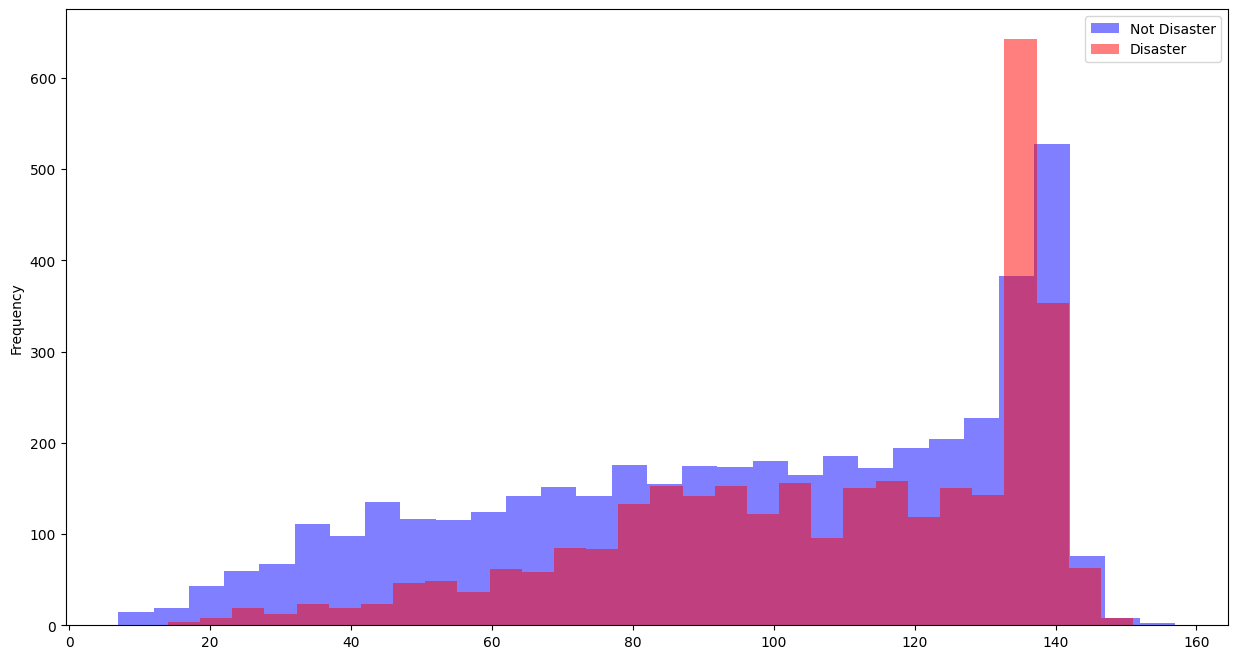

In [ ]:
combined.loc[combined.target==0,"text_len"].plot(kind='hist',alpha=0.5,color="blue",bins=30,label='Not Disaster')
combined.loc[combined.target==1,"text_len"].plot(kind='hist',alpha=0.5,color="red",bins=30,label='Disaster')
plt.legend()
plt.show()

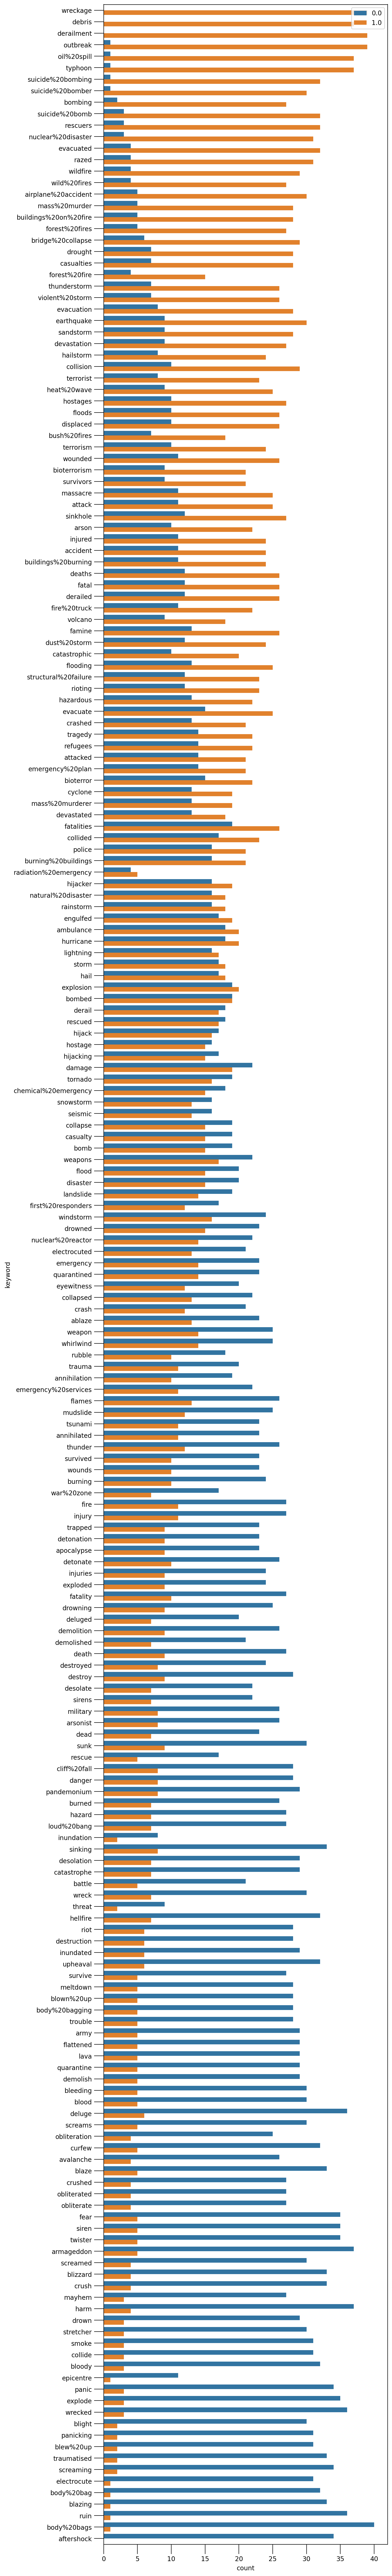

In [ ]:
## Keywords
plt.figure(figsize=(8,72),dpi=200)
combined['target_mean']=combined.groupby('keyword')['target'].transform('mean')
input_x=combined.sort_values(by='target_mean',ascending=False)['keyword']
hue=combined.sort_values(by='target_mean',ascending=False)['target']
sns.countplot(y=input_x,hue=hue,data=combined)
plt.tick_params(axis='y',size=15)
plt.tick_params(axis='x',size=15)
plt.legend(loc=1)
plt.show()


In [ ]:
combined.keyword.value_counts(normalize=True)[0:25].index

Index(['ablaze', 'lava', 'loud%20bang', 'mass%20murder', 'massacre', 'mayhem',
       'meltdown', 'military', 'mudslide', 'natural%20disaster',
       'nuclear%20disaster', 'nuclear%20reactor', 'obliterate', 'obliterated',
       'obliteration', 'oil%20spill', 'outbreak', 'pandemonium', 'panic',
       'panicking', 'police', 'quarantine', 'quarantined', 'rainstorm',
       'razed'],
      dtype='object', name='keyword')

In [ ]:
## clean the text
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import string
noise=string.punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,RegexpTokenizer

##Stop Words
stop_words=stopwords.words('english')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
text="@nxwestmidlands huge fire at Wholesale markets ablaze http://t.co/rwzbFVNXER"
newtext=re.sub("@[a-zA-Z]+|http://[a-zA-Z]+.+"," ",text).strip()
len(regex.tokenize(newtext))

6

In [ ]:
regex=RegexpTokenizer('[a-zA-Z]+')
regex.tokenize(text)
def clean_text(text):
    text = text.lower()
    text = re.sub("(www.+)|(\s+)|(@[a-zA-Z]+)|\W+", " ", text) # removes hyperlinks, special chars
    text = re.sub('(\w+:/\S+)', " ", text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = re.sub("http|https", " ", text)
    text = re.sub("[^a-zA-Z]+", " ", text)
    text = regex.tokenize(text)
    text=[word for word in text if len(word)>3]
    text=[word for word in text if word not in stop_words]
    text=[word for word in text if word not in noise]
    return(text)


In [ ]:
combined['text_clean']=combined.text.apply(clean_text)

In [ ]:
combined.head()

,id,keyword,location,text,target,text_len,target_mean,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1.0,69,NaN,"[deeds, reason, earthquake, allah, forgive]"
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0,38,NaN,"[forest, fire, near, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1.0,133,NaN,"[residents, asked, shelter, place, notified, o..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1.0,65,NaN,"[people, receive, wildfires, evacuation, order..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1.0,88,NaN,"[sent, photo, ruby, alaska, smoke, wildfires, ..."


In [ ]:
# Lets Visualize the Tokens

all_tokens=[token for review_tokens in combined.text_clean for token in review_tokens
            if token.lower() not in stop_words]

all_tokens[:5]

['deeds', 'reason', 'earthquake', 'allah', 'forgive']

In [ ]:
import matplotlib.pyplot as plt

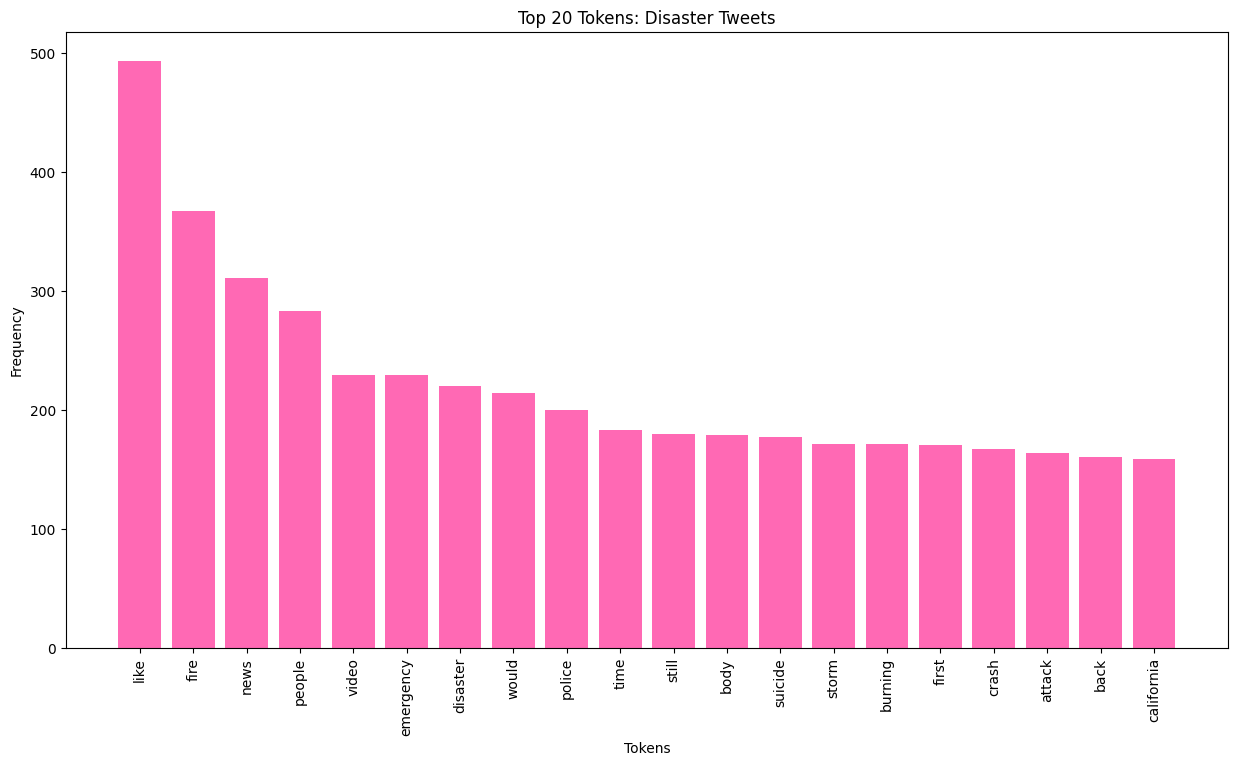

In [ ]:
## Finding the Frequency of the Tokens
from nltk.probability import FreqDist
freq=FreqDist(all_tokens).items()

## Since we have created freq_dist, lets create a DataFrame
df=pd.DataFrame(freq,columns=['Tokens','Frequency']).sort_values(by='Frequency',ascending=False)
df.head()

## Visualize the Top20 Tokens

plt.bar(df.Tokens[0:20],df.Frequency[0:20],color="hotpink")
plt.xticks(rotation=90)
plt.title("Top 20 Tokens: Disaster Tweets")
plt.xlabel("Tokens")
plt.ylabel("Frequency")
plt.show()

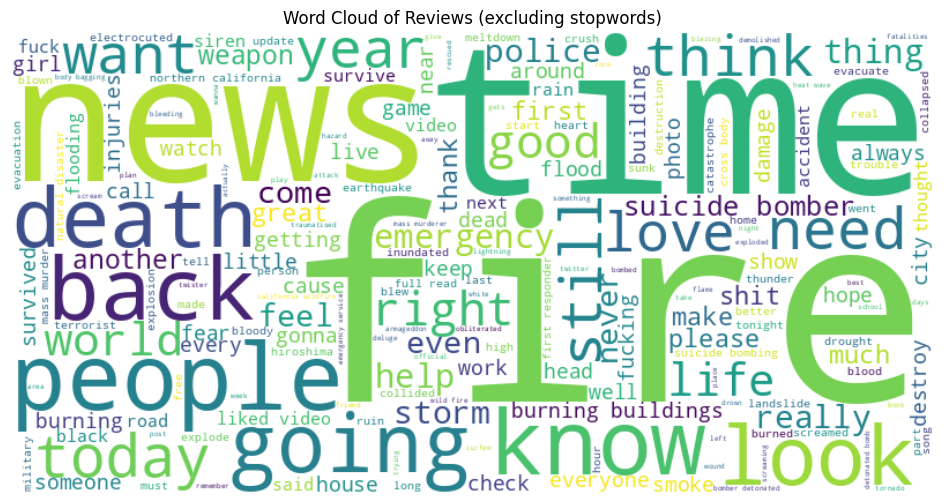

          Tokens  Frequency
105         like        493
6           fire        367
116         news        311
20        people        283
1215       video        229
52     emergency        229
39      disaster        220
285        would        214
146       police        200
161         time        183
483        still        180
871         body        179
1802     suicide        177
1230       storm        171
1694     burning        171
192        first        170
86         crash        167
1073      attack        164
433         back        160
23    california        159


In [ ]:
# lets generate the word cloud too...

# pip install wordcloud
from wordcloud import WordCloud


# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_tokens))
plt.figure(figsize=(12, 6))

# In image processing, interpolation refers to the method used to estimate the values of pixels at non-integer coordinates.
# When displaying an image, interpolation determines how intermediate pixels are calculated
# when resizing or transforming the image.

plt.imshow(wordcloud, interpolation='bilinear')

plt.title('Word Cloud of Reviews (excluding stopwords)')
plt.axis('off')
plt.show()

# Display the DataFrame
print(df.head(20))

**Word Embeddings**

## Cosine Similarity

* Cosine Angle between Two Vectors.
* Value is between -1 to 1.
* -ve 1 represents that there is lot of dissimilarity between two vectors.
* 0 represents orthogonality which means no relation.
* 1 represents Similar.



**Word Embeddings**

In [ ]:
from gensim.models import Word2Vec
sentences=[['king','kingdom','queen','warrior','war']]
model=Word2Vec(sentences,vector_size=100,min_count=1)
embeddings=model.wv
print('Vector representation of kind:')
print(embeddings['king'])
print("\nSimilarity between 'king' and 'queen'",model.wv.similarity("king","queen"))

Vector representation of kind:
[-0.00713902  0.00124103 -0.00717672 -0.00224462  0.0037193   0.00583312
  0.00119818  0.00210273 -0.00411039  0.00722533 -0.00630704  0.00464722
 -0.00821997  0.00203647 -0.00497705 -0.00424769 -0.00310898  0.00565521
  0.0057984  -0.00497465  0.00077333 -0.00849578  0.00780981  0.00925729
 -0.00274233  0.00080022  0.00074665  0.00547788 -0.00860608  0.00058446
  0.00686942  0.00223159  0.00112468 -0.00932216  0.00848237 -0.00626413
 -0.00299237  0.00349379 -0.00077263  0.00141129  0.00178199 -0.0068289
 -0.00972481  0.00904058  0.00619805 -0.00691293  0.00340348  0.00020606
  0.00475375 -0.00711994  0.00402695  0.00434743  0.00995737 -0.00447374
 -0.00138926 -0.00731732 -0.00969783 -0.00908026 -0.00102275 -0.00650329
  0.00484973 -0.00616403  0.00251919  0.00073944 -0.00339215 -0.00097922
  0.00997913  0.00914589 -0.00446183  0.00908303 -0.00564176  0.00593092
 -0.00309722  0.00343175  0.00301723  0.00690046 -0.00237388  0.00877504
  0.00758943 -0.00954

In [ ]:
!pip install sentence_transformers

In [ ]:
sentences=['king','kingdom','queen','warrior','war']
from sentence_transformers import SentenceTransformer,util
model=SentenceTransformer('all-mpnet-base-v2')
embeddings=model.encode(sentences)
util.cos_sim(embeddings[0],embeddings[3])[0]

tensor([0.4304])

**Feature Engineering on Data**

In [ ]:
newtrain=combined.loc[0:train.shape[0]-1,:]
newtest=combined.loc[train.shape[0]:,:]
newtest.drop("target",axis=1,inplace=True)


In [ ]:
x=newtrain.loc[:,["text_clean","text_len"]]
y=newtrain.loc[:,'target']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object with the desired parameters
countvector = CountVectorizer(binary=True, min_df=5, stop_words="english")

x['text_clean']=x['text_clean'].apply(lambda x:''.join(x) if isinstance(x,list) else x)

# Fit and transform the text data using the CountVectorizer
converted = countvector.fit_transform(x.text_clean)

# Convert the sparse matrix to a dense matrix for printing
converted_dense = converted.todense()

# Print the shape of the converted matrix
print(converted_dense.shape)

# Get the feature names from the CountVectorizer
feature_names = countvector.get_feature_names_out()

# Print the number of feature names
print(len(feature_names))

(7613, 14)
14


In [ ]:
# Assuming X.text_clean contains lists of strings, join them into single strings
newtest['text_clean'] = newtest['text_clean'].apply(lambda x: ' '.join(x) \
                                                    if isinstance(x, list) else x)

test_set = countvector.transform(newtest.loc[:, "text_clean"])

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
pred = gbm.fit(np.asarray(converted.todense()), y).predict(np.asarray(test_set.todense()))

In [ ]:
sub = pd.DataFrame({"id": test.id, "target": pred})

sub.to_csv("Final.csv", index = False)